# Student exam scores

## Loading the data

In [ ]:
# general
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import util

# scipy
from scipy.stats import f_oneway

# statsmodels
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, auc, roc_curve

data = pd.read_csv("data/Exam_Score_Prediction.csv", delimiter = ",")

print(data.info())
display(data.iloc[0:5])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        20000 non-null  int64  
 1   age               20000 non-null  int64  
 2   gender            20000 non-null  object 
 3   course            20000 non-null  object 
 4   study_hours       20000 non-null  float64
 5   class_attendance  20000 non-null  float64
 6   internet_access   20000 non-null  object 
 7   sleep_hours       20000 non-null  float64
 8   sleep_quality     20000 non-null  object 
 9   study_method      20000 non-null  object 
 10  facility_rating   20000 non-null  object 
 11  exam_difficulty   20000 non-null  object 
 12  exam_score        20000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 2.0+ MB
None


,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


## EDA

### Checking for duplicates

In [185]:
print(data.duplicated().sum())

0


### Univariate analyses

#### Age

In [186]:
print(data["age"].sort_values(ascending = True).unique())
print(data["age"].value_counts(normalize = True))

[17 18 19 20 21 22 23 24]
age
21    0.12775
18    0.12710
19    0.12640
17    0.12570
22    0.12485
20    0.12440
24    0.12215
23    0.12165
Name: proportion, dtype: float64


c:\Users\david\OneDrive\Escritorio\Trabajo\Python\0_portfolio_projects\5_exam_scores\util.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = data, palette = "bright")


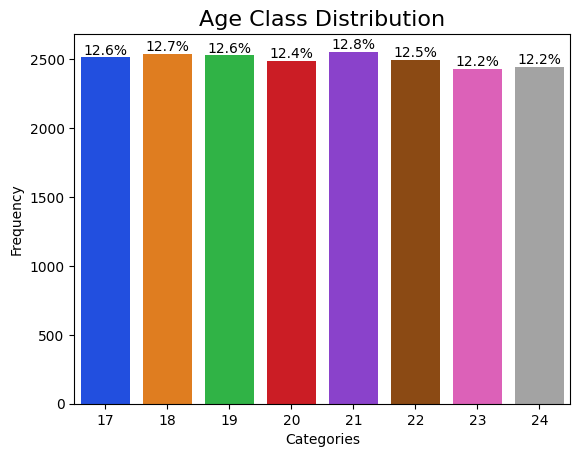

<Figure size 640x480 with 0 Axes>

In [187]:
util.make_countplot(data["age"], "age")

In [188]:
print("Average age: {}".format(np.mean(data["age"])))
print("Median age: {}".format(np.median(data["age"])))
print("Std. dev. of age: {}".format(np.std(data["age"])))

Average age: 20.4733
Median age: 20.0
Std. dev. of age: 2.2844008207843034


Findings:
- The distribution of age in this dataset is practically flat.
- There are only 8 unique ages, with each group of them representing between 12.4% and 12.8% of all data points.

#### Gender

In [189]:
print(data["gender"].unique())
print(data["gender"].value_counts(normalize = True))

['male' 'other' 'female']
gender
other     0.33630
male      0.33475
female    0.32895
Name: proportion, dtype: float64


#### Course

In [190]:
print(data["course"].unique())
print(data["course"].value_counts(normalize = True))

['diploma' 'bca' 'b.sc' 'b.tech' 'bba' 'ba' 'b.com']
course
bca        0.1451
ba         0.1448
b.sc       0.1439
b.com      0.1432
bba        0.1418
diploma    0.1413
b.tech     0.1399
Name: proportion, dtype: float64


c:\Users\david\OneDrive\Escritorio\Trabajo\Python\0_portfolio_projects\5_exam_scores\util.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = data, palette = "bright")


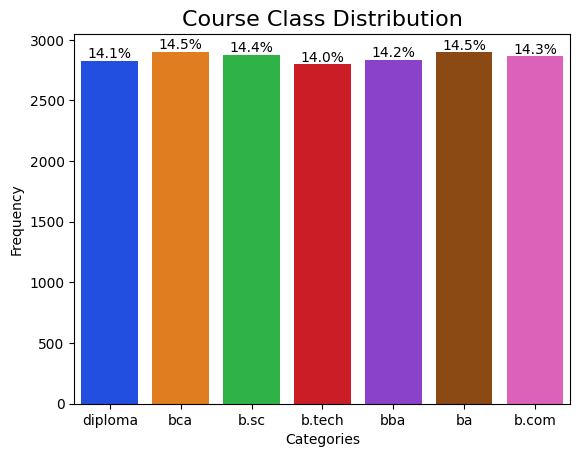

<Figure size 640x480 with 0 Axes>

In [191]:
util.make_countplot(data["course"], "course")

Findings:
- Similarly to age, courses are largely evenly distributed.
- With a total of 7 unique categories, each group represents between 14% and 14.5% of all data points.

#### Study hours

In [192]:
print(data["study_hours"].sort_values(ascending = True).unique())
print(data["study_hours"].nunique())

[0.08 0.09 0.1  0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21
 0.22 0.23 0.24 0.25 0.26 0.27 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35
 0.36 0.37 0.38 0.39 0.4  0.41 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49
 0.5  0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63
 0.64 0.65 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77
 0.78 0.79 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91
 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99 1.   1.01 1.02 1.03 1.04 1.05
 1.06 1.07 1.08 1.09 1.1  1.11 1.12 1.13 1.14 1.15 1.16 1.17 1.18 1.19
 1.2  1.21 1.22 1.23 1.24 1.25 1.26 1.27 1.28 1.29 1.3  1.31 1.32 1.33
 1.34 1.35 1.36 1.37 1.38 1.39 1.4  1.41 1.42 1.43 1.44 1.45 1.46 1.47
 1.48 1.49 1.5  1.51 1.52 1.53 1.54 1.55 1.56 1.57 1.58 1.59 1.6  1.61
 1.62 1.63 1.64 1.65 1.66 1.67 1.68 1.69 1.7  1.71 1.72 1.73 1.74 1.75
 1.76 1.77 1.78 1.79 1.8  1.81 1.82 1.83 1.84 1.85 1.86 1.87 1.88 1.89
 1.9  1.91 1.92 1.93 1.94 1.95 1.96 1.97 1.98 1.99 2.   2.01 2.02 2.03
 2.04 

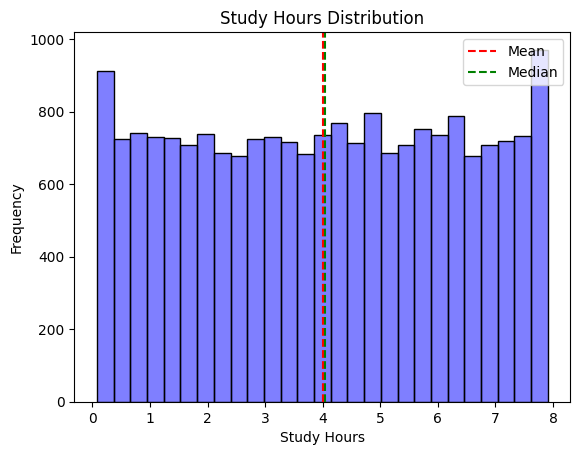

<Figure size 640x480 with 0 Axes>

In [193]:
util.make_hist(data["study_hours"], "study hours")

In [194]:
print("Average number of hours studied: {}".format(np.mean(data["study_hours"])))
print("Median number of hours studied: {}".format(np.median(data["study_hours"])))
print("Std. dev. of hours studied: {}".format(np.std(data["study_hours"])))

Average number of hours studied: 4.0076035
Median number of hours studied: 4.04
Std. dev. of hours studied: 2.3082551942512226


Findings:
- The distribution of hours studied is mostly flat with two noticeable peaks, one on each end.
- There's a high concentration of students in the lowest numbers of hours studied and an even higher concentration on the largest number of hours studied.
- On average, students studied 4 hours for their exams.

#### Class attendance

In [195]:
print(data["class_attendance"].sort_values(ascending = True).unique())

[40.6 40.7 40.8 40.9 41.  41.1 41.2 41.3 41.4 41.5 41.6 41.7 41.8 41.9
 42.  42.1 42.2 42.3 42.4 42.5 42.6 42.7 42.8 42.9 43.  43.1 43.2 43.3
 43.4 43.5 43.6 43.7 43.8 43.9 44.  44.1 44.2 44.3 44.4 44.5 44.6 44.7
 44.8 44.9 45.  45.1 45.2 45.3 45.4 45.5 45.6 45.7 45.8 45.9 46.  46.1
 46.2 46.3 46.4 46.5 46.6 46.7 46.8 46.9 47.  47.1 47.2 47.3 47.4 47.5
 47.6 47.7 47.8 47.9 48.  48.1 48.2 48.3 48.4 48.5 48.6 48.7 48.8 48.9
 49.  49.1 49.2 49.3 49.4 49.5 49.6 49.7 49.8 49.9 50.  50.1 50.2 50.3
 50.4 50.5 50.6 50.7 50.8 50.9 51.  51.1 51.2 51.3 51.4 51.5 51.6 51.7
 51.8 51.9 52.  52.1 52.2 52.3 52.4 52.5 52.6 52.7 52.8 52.9 53.  53.1
 53.2 53.3 53.4 53.5 53.6 53.7 53.8 53.9 54.  54.1 54.2 54.3 54.4 54.5
 54.6 54.7 54.8 54.9 55.  55.1 55.2 55.3 55.4 55.5 55.6 55.7 55.8 55.9
 56.  56.1 56.2 56.3 56.4 56.5 56.6 56.7 56.8 56.9 57.  57.1 57.2 57.3
 57.4 57.5 57.6 57.7 57.8 57.9 58.  58.1 58.2 58.3 58.4 58.5 58.6 58.7
 58.8 58.9 59.  59.1 59.2 59.3 59.4 59.5 59.6 59.7 59.8 59.9 60.  60.1
 60.2 

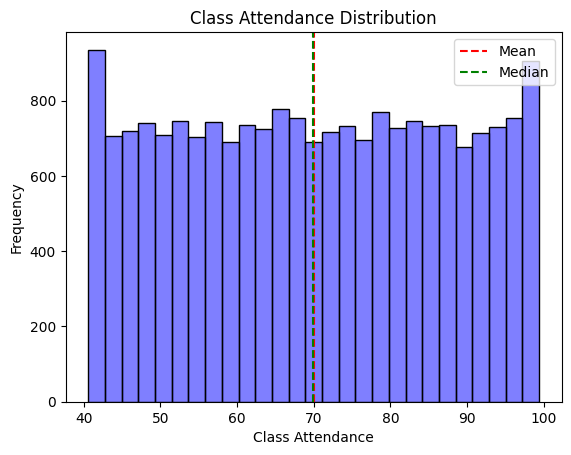

<Figure size 640x480 with 0 Axes>

In [196]:
util.make_hist(data["class_attendance"], "class attendance")

In [197]:
print("Average class attendance: {}".format(np.mean(data["class_attendance"])))
print("Median class attendance: {}".format(np.median(data["class_attendance"])))
print("Std. dev. of class attendance: {}".format(np.std(data["class_attendance"])))

Average class attendance: 70.017365
Median class attendance: 69.9
Std. dev. of class attendance: 17.28183008123778


Findings:
- The average class attendance is 70%, with a standard deviation of 17.28.
- The distribution is mostly flat, with two noticeable peaks on the lower and higher tails of the distribution.

#### Internet access

In [198]:
print(data["internet_access"].value_counts(normalize = True))

internet_access
yes    0.8494
no     0.1506
Name: proportion, dtype: float64


#### Sleep hours

In [199]:
print(data["sleep_hours"].sort_values(ascending = True).unique())

[4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8
 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1 7.2 7.3 7.4 7.5 7.6
 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9 9.  9.1 9.2 9.3 9.4
 9.5 9.6 9.7 9.8 9.9]


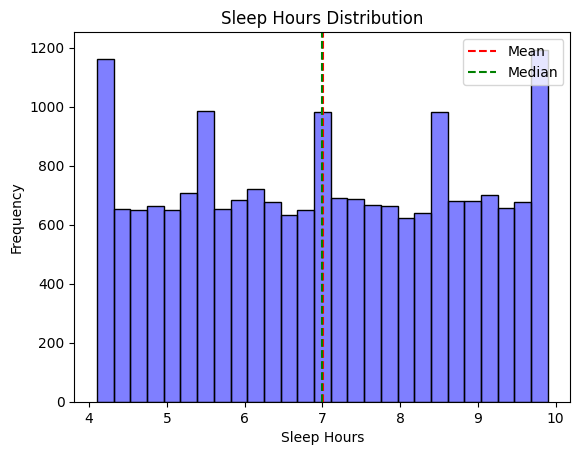

<Figure size 640x480 with 0 Axes>

In [200]:
util.make_hist(data["sleep_hours"], "sleep hours")

#### Sleep quality

In [201]:
print(data["sleep_quality"].unique())
print(data["sleep_quality"].value_counts(normalize = True))

['poor' 'average' 'good']
sleep_quality
average    0.33470
poor       0.33435
good       0.33095
Name: proportion, dtype: float64


#### Study method

In [202]:
print(data["study_method"].unique())

['coaching' 'online videos' 'mixed' 'self-study' 'group study']


c:\Users\david\OneDrive\Escritorio\Trabajo\Python\0_portfolio_projects\5_exam_scores\util.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = data, palette = "bright")


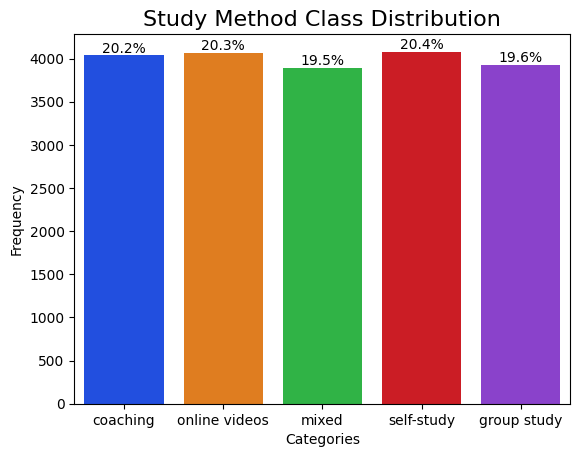

<Figure size 640x480 with 0 Axes>

In [203]:
util.make_countplot(data["study_method"], "study method")

#### Facility rating

In [204]:
print(data["facility_rating"].unique())

['low' 'medium' 'high']


c:\Users\david\OneDrive\Escritorio\Trabajo\Python\0_portfolio_projects\5_exam_scores\util.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = data, palette = "bright")


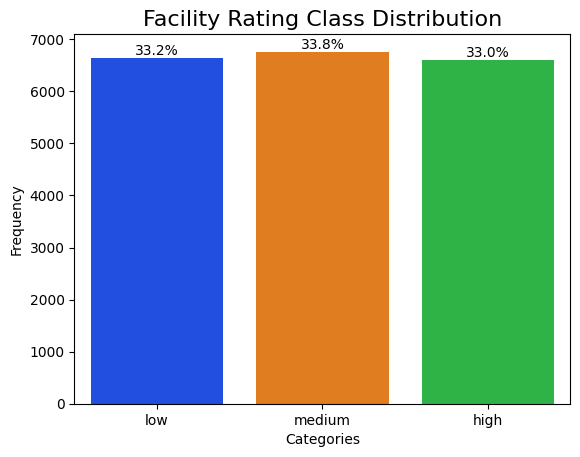

<Figure size 640x480 with 0 Axes>

In [205]:
util.make_countplot(data["facility_rating"], "facility rating")

#### Exam difficulty

In [206]:
print(data["exam_difficulty"].unique())

['hard' 'moderate' 'easy']


c:\Users\david\OneDrive\Escritorio\Trabajo\Python\0_portfolio_projects\5_exam_scores\util.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = data, palette = "bright")


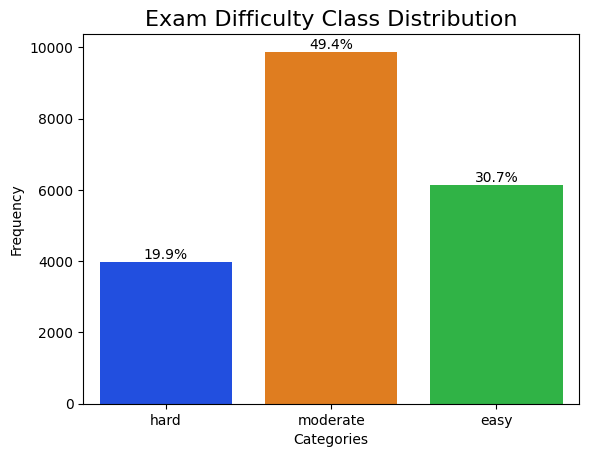

<Figure size 640x480 with 0 Axes>

In [207]:
util.make_countplot(data["exam_difficulty"], "exam difficulty")

#### Exam score

In [208]:
print(data["exam_score"].sort_values(ascending = True).unique())

[ 19.599  19.6    19.7    19.8    19.9    20.     20.1    20.3    20.4
  20.5    20.6    20.7    20.8    20.9    21.     21.1    21.2    21.3
  21.4    21.5    21.6    21.7    21.8    21.9    22.     22.1    22.2
  22.3    22.4    22.5    22.6    22.7    22.8    22.9    23.     23.1
  23.2    23.3    23.4    23.5    23.6    23.7    23.8    23.9    24.
  24.1    24.2    24.3    24.4    24.5    24.6    24.7    24.8    24.9
  25.     25.1    25.2    25.3    25.4    25.5    25.6    25.7    25.8
  25.9    26.     26.1    26.2    26.3    26.4    26.5    26.6    26.7
  26.8    26.9    27.     27.1    27.2    27.3    27.4    27.5    27.6
  27.7    27.8    27.9    28.     28.1    28.2    28.3    28.4    28.5
  28.6    28.7    28.8    28.9    29.     29.1    29.2    29.3    29.4
  29.5    29.6    29.7    29.8    29.9    30.     30.1    30.2    30.3
  30.4    30.5    30.6    30.7    30.8    30.9    31.     31.1    31.2
  31.3    31.4    31.5    31.6    31.7    31.8    31.9    32.     32.1
  32.2 

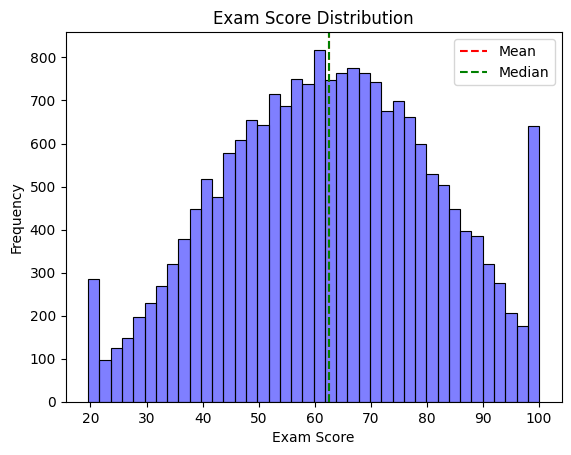

<Figure size 640x480 with 0 Axes>

In [209]:
util.make_hist(data["exam_score"], "exam score")

In [210]:
print("Average exam score: {}".format(np.mean(data["exam_score"])))
print("Median exam score: {}".format(np.median(data["exam_score"])))
print("Std. dev. of exam scores: {}".format(np.std(data["exam_score"])))

Average exam score: 62.513225
Median exam score: 62.6
Std. dev. of exam scores: 18.90801844745702


In order to be able to implement a classification algorithm later on, we'll make our target variable "pass", which is a binary categorical variable that can take the values of 1 when the student passed the exam or 0 when the student didn't pass the exam. The passing threshold will be a grade of 70, meaning any grade equal to 70 or more is a pass and any grade below 70 is not a pass.<br><br>
Taking into consideration that grades are, for the most part, normally distributed, this will also create a certain class imbalance that will need to be addressed when building the model.

In [211]:
data["pass"] = [1 if i >= 70 else 0 for i in data["exam_score"]]
print(data["pass"].value_counts(normalize = True))

pass
0    0.63915
1    0.36085
Name: proportion, dtype: float64


### Multivariate analyses

#### Exam score and study hours

c:\Users\david\OneDrive\Escritorio\Trabajo\Python\0_portfolio_projects\5_exam_scores\util.py:68: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = data_1,


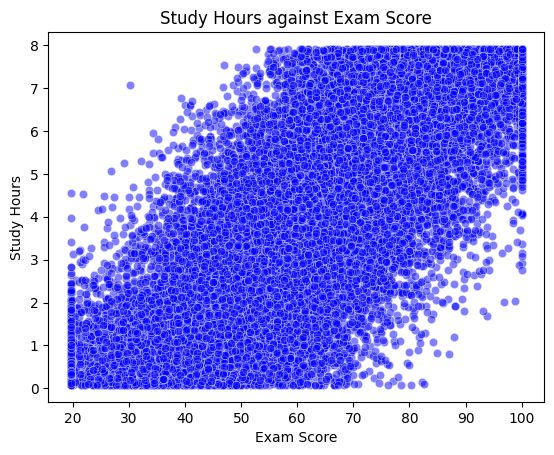

<Figure size 640x480 with 0 Axes>

In [212]:
util.make_scatter(data["exam_score"], "exam score", 
                  data["study_hours"], "study hours")

Findings:
- There is a clear direct, linear relationship between the score the student gets on the exam and the number of hours the student spends studying for the exam.

#### Exam score and exam difficulty

c:\Users\david\OneDrive\Escritorio\Trabajo\Python\0_portfolio_projects\5_exam_scores\util.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = grouped_data_dict.keys(),


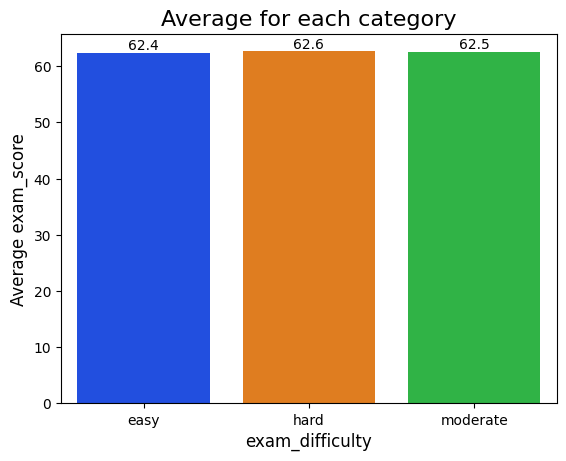

,exam_difficulty,exam_score
0,easy,62.383022
1,hard,62.629580
2,moderate,62.547277


<Figure size 640x480 with 0 Axes>

In [213]:
util.make_biv_barplot(data, "exam_difficulty", "exam_score")

Regardless of the exam's difficulty, the average grade appears to be the same.

#### Exam score and facility rating

c:\Users\david\OneDrive\Escritorio\Trabajo\Python\0_portfolio_projects\5_exam_scores\util.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = grouped_data_dict.keys(),


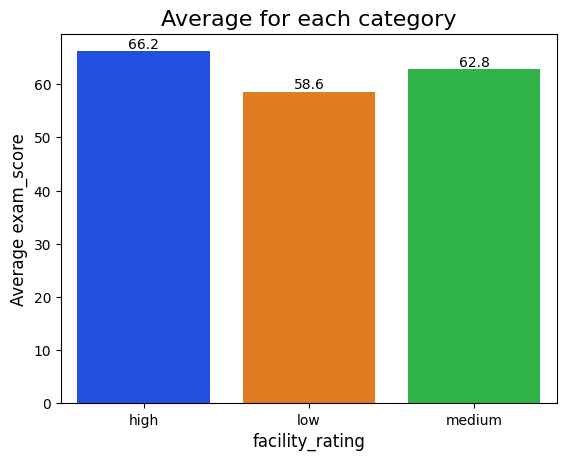

<Figure size 640x480 with 0 Axes>

In [214]:
score_facility = util.make_biv_barplot(data, "facility_rating", "exam_score")

The facility's rating appears to have a stronger impact on the average exam score of the students. Given the noticeable differences, we'll conduct an ANOVA test to determine whether these differences are statistically significant or just the result of random chance.

In [215]:
### ANOVA
fstat, pval = f_oneway(data["exam_score"][data["facility_rating"] == "low"],
                       data["exam_score"][data["facility_rating"] == "medium"],
                       data["exam_score"][data["facility_rating"] == "high"])
print(pval)

5.050711280881854e-118


With a p-value practically equal to zero, we can reject the null hypothesis and therefore conclude that the average score between the groups are indeed different. We'll also perform Tukey's test to determine what pairs exactly are the ones showing a difference that's statistically significant.

In [216]:
### Tukey
tukey_results = pairwise_tukeyhsd(data["exam_score"], data["facility_rating"])
print(tukey_results.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
  high    low  -7.5716   0.0 -8.3316 -6.8115   True
  high medium  -3.3719   0.0 -4.1285 -2.6152   True
   low medium   4.1997   0.0  3.4441  4.9553   True
---------------------------------------------------


The difference for all pairs are statistically signficant, so we can conclude that there is a correlation between the facility's rating and the score that the student obtains in their exam.

#### Exam score and class attendance

c:\Users\david\OneDrive\Escritorio\Trabajo\Python\0_portfolio_projects\5_exam_scores\util.py:68: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = data_1,


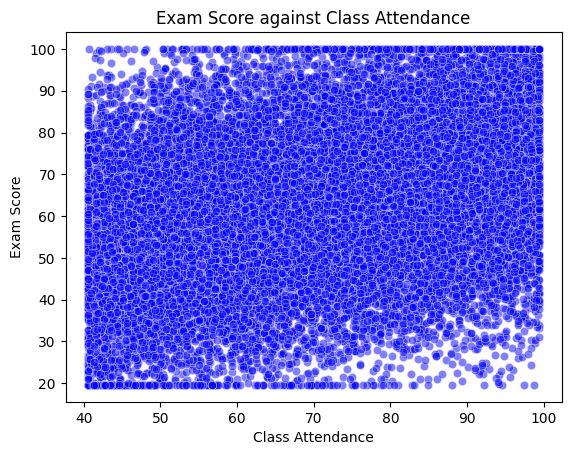

<Figure size 640x480 with 0 Axes>

In [217]:
util.make_scatter(data["class_attendance"], "class attendance",
                  data["exam_score"], "exam score")

Since it's difficult to tell if there's any type of relationship between the two variables with a regular scatter plot, we'll fit a regression line through it to see if we can identify any type of pattern.

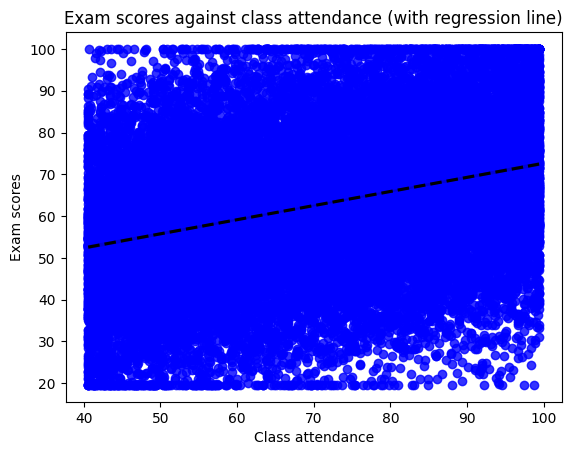

<Figure size 640x480 with 0 Axes>

In [218]:
plt.figure()
sns.regplot(x = "class_attendance",
            y = "exam_score",
            data = data,
            scatter_kws = {"color": "blue"},
            line_kws = {"color": "black", "linestyle": "dashed"})
plt.title("Exam scores against class attendance (with regression line)")
plt.xlabel("Class attendance")
plt.ylabel("Exam scores")
plt.show()
plt.clf()

With a regression line included, it's easier to see that there does appear to be a linear relationship between these two variables. However, the points are so scattered that this should still be taken with caution.

#### Exam score and study method

c:\Users\david\OneDrive\Escritorio\Trabajo\Python\0_portfolio_projects\5_exam_scores\util.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = grouped_data_dict.keys(),


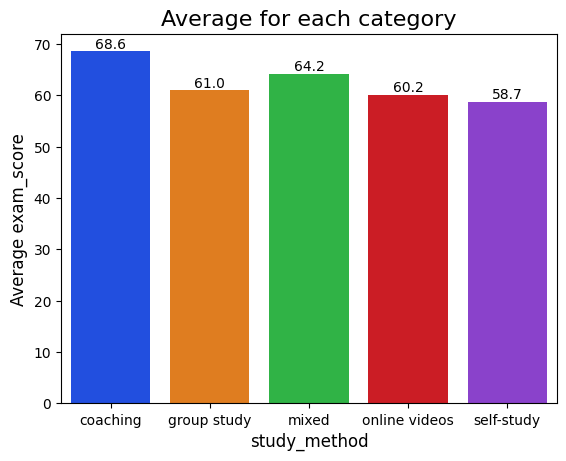

<Figure size 640x480 with 0 Axes>

In [219]:
score_method = util.make_biv_barplot(data, "study_method", "exam_score")

In [220]:
### ANOVA
fstat, pval = f_oneway(data["exam_score"][data["study_method"] == "coaching"],
                       data["exam_score"][data["study_method"] == "group study"],
                       data["exam_score"][data["study_method"] == "mixed"],
                       data["exam_score"][data["study_method"] == "online videos"],
                       data["exam_score"][data["study_method"] == "self-study"])
print(pval)

3.1986673685643177e-152


In [221]:
### Tukey
tukey_results = pairwise_tukeyhsd(data["exam_score"], data["study_method"])
print(tukey_results.summary())

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------
     coaching   group study  -7.5835    0.0  -8.7198 -6.4471   True
     coaching         mixed  -4.3081    0.0  -5.4465 -3.1697   True
     coaching online videos  -8.3993    0.0  -9.5252 -7.2734   True
     coaching    self-study   -9.821    0.0 -10.9463 -8.6958   True
  group study         mixed   3.2754    0.0   2.1289  4.4219   True
  group study online videos  -0.8158 0.2846  -1.9499  0.3183  False
  group study    self-study  -2.2376    0.0   -3.371 -1.1042   True
        mixed online videos  -4.0912    0.0  -5.2273  -2.955   True
        mixed    self-study   -5.513    0.0  -6.6484 -4.3775   True
online videos    self-study  -1.4218  0.005  -2.5447 -0.2989   True
-------------------------------------------------------------------


#### Exam score and course

c:\Users\david\OneDrive\Escritorio\Trabajo\Python\0_portfolio_projects\5_exam_scores\util.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = grouped_data_dict.keys(),


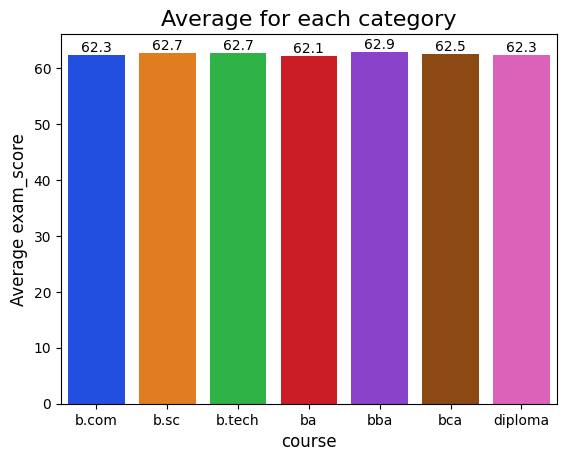

<Figure size 640x480 with 0 Axes>

In [222]:
score_course = util.make_biv_barplot(data, "course", "exam_score")

# Logistic Regression Model

## Preparing the data

In [223]:
print(data.info())
display(data.iloc[:5])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        20000 non-null  int64  
 1   age               20000 non-null  int64  
 2   gender            20000 non-null  object 
 3   course            20000 non-null  object 
 4   study_hours       20000 non-null  float64
 5   class_attendance  20000 non-null  float64
 6   internet_access   20000 non-null  object 
 7   sleep_hours       20000 non-null  float64
 8   sleep_quality     20000 non-null  object 
 9   study_method      20000 non-null  object 
 10  facility_rating   20000 non-null  object 
 11  exam_difficulty   20000 non-null  object 
 12  exam_score        20000 non-null  float64
 13  pass              20000 non-null  int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 2.1+ MB
None


,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score,pass
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9,0
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8,0
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3,1
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7,0
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7,0


In [224]:
features = data[["age", "gender", "course", "study_hours", "class_attendance", "internet_access",
            "sleep_hours", "sleep_quality", "study_method", "facility_rating", "exam_difficulty"]]
cat_cols = ["gender", "course", "internet_access", "sleep_quality", 
            "study_method", "facility_rating", "exam_difficulty"]

X = pd.get_dummies(data = features, columns = cat_cols, drop_first = True)
y = data["pass"]

print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         20000 non-null  int64  
 1   study_hours                 20000 non-null  float64
 2   class_attendance            20000 non-null  float64
 3   sleep_hours                 20000 non-null  float64
 4   gender_male                 20000 non-null  bool   
 5   gender_other                20000 non-null  bool   
 6   course_b.sc                 20000 non-null  bool   
 7   course_b.tech               20000 non-null  bool   
 8   course_ba                   20000 non-null  bool   
 9   course_bba                  20000 non-null  bool   
 10  course_bca                  20000 non-null  bool   
 11  course_diploma              20000 non-null  bool   
 12  internet_access_yes         20000 non-null  bool   
 13  sleep_quality_good          200

In [225]:
map_dict = {True: 1, False: 0}

for col in X.columns[4:]:
    X[col] = X[col].map(map_dict)

display(X)

,age,study_hours,class_attendance,sleep_hours,gender_male,gender_other,course_b.sc,course_b.tech,course_ba,course_bba,...,sleep_quality_good,sleep_quality_poor,study_method_group study,study_method_mixed,study_method_online videos,study_method_self-study,facility_rating_low,facility_rating_medium,exam_difficulty_hard,exam_difficulty_moderate
0,17,2.78,92.9,7.4,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1,23,3.37,64.8,4.6,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
2,22,7.88,76.8,8.5,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,20,0.67,48.4,5.8,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
4,20,0.89,71.6,9.8,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,18,6.50,71.3,5.0,0,1,0,0,0,1,...,1,0,0,0,0,1,1,0,0,0
19996,18,3.71,41.6,5.9,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
19997,19,7.88,68.2,4.6,0,1,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
19998,19,4.60,76.3,6.1,1,0,0,0,0,1,...,1,0,0,0,0,1,0,1,0,1


In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

### standardize numerical features
num_cols = ["age", "study_hours", "class_attendance", "sleep_hours"]
scaler = StandardScaler()

# fit and transform training data
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

# transform test data
X_test[num_cols] = scaler.transform(X_test[num_cols])

display(X_train)

,age,study_hours,class_attendance,sleep_hours,gender_male,gender_other,course_b.sc,course_b.tech,course_ba,course_bba,...,sleep_quality_good,sleep_quality_poor,study_method_group study,study_method_mixed,study_method_online videos,study_method_self-study,facility_rating_low,facility_rating_medium,exam_difficulty_hard,exam_difficulty_moderate
19079,-1.519353,-0.639173,-1.591218,-0.526013,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
14151,-0.205010,0.890480,1.208487,0.512419,0,0,1,0,0,0,...,0,1,1,0,0,0,1,0,0,0
18907,0.671219,-0.647839,0.890339,0.397038,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
10940,-0.643125,0.634816,0.919262,-0.352941,0,0,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0
11510,-0.643125,0.444151,1.561343,-0.872157,0,1,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8287,-0.205010,0.028155,1.092797,0.858563,0,1,1,0,0,0,...,1,0,0,0,0,1,0,0,1,0
16968,-0.205010,1.562141,-0.382255,1.550851,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
5804,-0.643125,-1.419166,-1.024336,-1.564445,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3875,0.233104,0.873147,0.560622,0.512419,0,1,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0


## Checking for correlations between regressors

In [227]:
vif_results = pd.DataFrame({
    "feature": X_train.columns,
    "VIF": np.zeros(len(X_train.columns))
})

for col in X_train.columns:
    vif_value = variance_inflation_factor(X_train, list(X_train.columns).index(col))
    vif_results.loc[vif_results["feature"] == col, "VIF"] = vif_value

print(vif_results.sort_values(by = "VIF", ascending = True))

                       feature       VIF
0                          age  1.001080
2             class_attendance  1.001126
3                  sleep_hours  1.001229
1                  study_hours  1.001555
21        exam_difficulty_hard  1.566083
11              course_diploma  1.705052
9                   course_bba  1.711637
7                course_b.tech  1.715391
8                    course_ba  1.728371
10                  course_bca  1.737455
6                  course_b.sc  1.746702
16          study_method_mixed  1.754319
15    study_method_group study  1.778576
17  study_method_online videos  1.810350
18     study_method_self-study  1.813341
13          sleep_quality_good  1.872242
14          sleep_quality_poor  1.881698
19         facility_rating_low  1.890447
4                  gender_male  1.891404
5                 gender_other  1.896747
20      facility_rating_medium  1.906441
22    exam_difficulty_moderate  2.403646
12         internet_access_yes  5.159538


The only feature with a VIF value that's somewhat concerning is the dummy variable for internet access, with a VIF of 5.16. However, since this is quite close to the 5 threshold and the sample size is not particularly small, we won't drop it yet, though it'll be something to keep in mind.

## Hyperparameter tuning

With a logistic regression, we can tune the following hyperparameters:
- penalty
    - l1
    - l2
    - elasticnet
    - None
- C
    - Inverse of the regularization strength.

In [228]:
estimator = LogisticRegression(l1_ratio = 0.5, 
                               solver = "saga", 
                               max_iter = 10000, 
                               class_weight = "balanced", 
                               random_state = 42)
param_grid = {"penalty": ["l1", "l2", "elasticnet", None],
              "C": [0.1, 0.3, 0.5, 0.7, 1, 2]}

gs_cv = GridSearchCV(estimator = estimator, 
                     param_grid = param_grid, 
                     scoring = "accuracy", 
                     refit = True,
                     cv = 5)
gs_cv.fit(X_train, y_train)

print("Best parameters: {}".format(gs_cv.best_params_))
print("Highest accuracy obtained: {}".format(gs_cv.best_score_))

c:\Users\david\OneDrive\Escritorio\Trabajo\Python\0_portfolio_projects\5_exam_scores\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
c:\Users\david\OneDrive\Escritorio\Trabajo\Python\0_portfolio_projects\5_exam_scores\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1152: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\david\OneDrive\Escritorio\Trabajo\Python\0_portfolio_projects\5_exam_scores\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.5. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(


Best parameters: {'C': 0.1, 'penalty': 'l1'}
Highest accuracy obtained: 0.8370000000000001


## Fitting and evaluating the model

### Checking parameters

In [229]:
classifier = LogisticRegression(penalty = "l1", C = 0.5, solver = "saga", max_iter = 10000)
classifier.fit(X_train, y_train)

classifier_df = pd.DataFrame({
    "feature": X_train.columns,
    "coefficient": [np.nan for i in range(len(X_train.columns))]
})

for i in range(len(classifier.coef_[0])):
    classifier_df.loc[classifier_df["feature"] == X_train.columns[i], "coefficient"] = classifier.coef_[0][i]

display(classifier_df)

c:\Users\david\OneDrive\Escritorio\Trabajo\Python\0_portfolio_projects\5_exam_scores\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
c:\Users\david\OneDrive\Escritorio\Trabajo\Python\0_portfolio_projects\5_exam_scores\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(


,feature,coefficient
0,age,-0.022094
1,study_hours,2.400789
2,class_attendance,1.044191
3,sleep_hours,0.425086
4,gender_male,0.039797
5,gender_other,0.038433
6,course_b.sc,-0.009566
7,course_b.tech,-0.073392
8,course_ba,0.033286
9,course_bba,0.023093


In [230]:
print(classifier_df.sort_values(by = "coefficient", ascending = True))

                       feature  coefficient
18     study_method_self-study    -1.642719
19         facility_rating_low    -1.502081
17  study_method_online videos    -1.496595
15    study_method_group study    -1.350421
14          sleep_quality_poor    -0.900122
20      facility_rating_medium    -0.787625
16          study_method_mixed    -0.711199
11              course_diploma    -0.085857
7                course_b.tech    -0.073392
0                          age    -0.022094
6                  course_b.sc    -0.009566
21        exam_difficulty_hard     0.000000
10                  course_bca     0.000000
9                   course_bba     0.023093
22    exam_difficulty_moderate     0.026295
8                    course_ba     0.033286
5                 gender_other     0.038433
4                  gender_male     0.039797
12         internet_access_yes     0.056635
3                  sleep_hours     0.425086
13          sleep_quality_good     0.796981
2             class_attendance  

Looking at the coefficients of the regularized regression, we can see that some of them have been set to zero:
- course_bca.
- exam_difficulty_hard<br><br>

Since these are dummy variables and not entire categories, this is essentially telling us that these have no statistically significant effect beyond what the baseline already has.<br><br>

Also, out of all the features, hours of study is the one that appears to have the strongest positive impact on the outcome variable, and using self-study appears to have the strongest negative impact on the outcome variable.

### Testing against test data

In [231]:
y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)

# accuracy
print("Accuracy on training data: {}".format(classifier.score(X_train, y_train)))
print("Accuracy on test data: {}\n".format(classifier.score(X_test, y_test)))

# precision
precision_train = precision_score(y_test, y_pred)
precision_test = precision_score(y_train, y_pred_train)
print("Precision on training data: {}".format(precision_train))
print("Precision on test data: {}\n".format(precision_test))

# recall
recall_train = recall_score(y_train, y_pred_train)
recall_test = recall_score(y_test, y_pred)
print("Recall on training data: {}".format(recall_train))
print("Recall on test data: {}\n".format(recall_test))

# f1 score
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred)
print("F1 score on training data: {}".format(f1_train))
print("F1 score on test data: {}".format(f1_test))

Accuracy on training data: 0.8464375
Accuracy on test data: 0.84775

Precision on training data: 0.8008658008658008
Precision on test data: 0.7947396481251111

Recall on training data: 0.7745064080360236
Recall on test data: 0.7692307692307693

F1 score on training data: 0.7844925883694412
F1 score on test data: 0.7847295864262991


Since the model was tuned for accuracy, it makes sense that accuracy is the highest of the 4 metrics. However, the model also achieves relatively high scores in the other metrics. With a recall score of 0.769 (the lowest metric), the classifier is still performing well.<br><br>
Also, the fact that all 4 metrics achieve practically the same values across both the training and test data suggests that the model is not overfitting the data, which is also a very good sign.

### ROC Curve and AUC Score

In [232]:
y_pred_proba = classifier.predict_proba(X_test)

### AUC score
auc_score = roc_auc_score(y_test, y_pred_proba[:,1])
print("AUC score: {}".format(auc_score))

AUC score: 0.9276623273494606


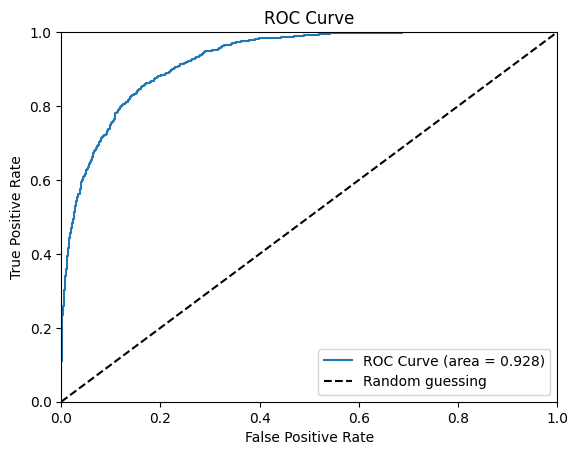

<Figure size 640x480 with 0 Axes>

In [235]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label = "ROC Curve (area = %0.3f)" % roc_auc)
plt.plot([0, 1], [0, 1], linestyle = "dashed", color = "black", label = "Random guessing")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()
plt.clf()

An AUC score of 0.927 shows that the classifier is actually performing quite well, which is in accordance to what the other 4 metrics seen earlier suggest.